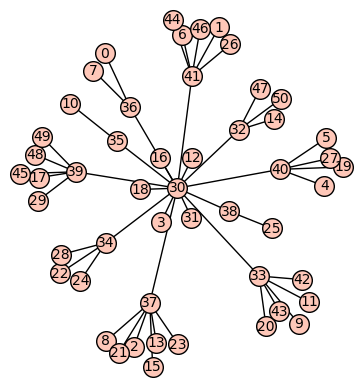

({0: [36],
  1: [41],
  2: [37],
  3: [30],
  4: [40],
  5: [40],
  6: [41],
  7: [36],
  8: [37],
  9: [33],
  10: [35],
  11: [33],
  12: [30],
  13: [37],
  14: [32],
  15: [37],
  16: [30],
  17: [39],
  18: [30],
  19: [40],
  20: [33],
  21: [37],
  22: [34],
  23: [37],
  24: [34],
  25: [38],
  26: [41],
  27: [40],
  28: [34],
  29: [39],
  30: [16, 32, 33, 18, 34, 3, 35, 36, 37, 38, 39, 40, 41, 12, 31],
  31: [30],
  32: [50, 14, 30, 47],
  33: [20, 9, 42, 11, 43, 30],
  34: [22, 24, 28, 30],
  35: [10, 30],
  36: [0, 7, 30],
  37: [2, 21, 23, 8, 13, 30, 15],
  38: [25, 30],
  39: [48, 17, 49, 29, 45, 30],
  40: [19, 4, 5, 27, 30],
  41: [1, 6, 26, 44, 30, 46],
  42: [33],
  43: [33],
  44: [41],
  45: [39],
  46: [41],
  47: [32],
  48: [39],
  49: [39],
  50: [32]},
 4064,
 None)

In [1]:
import random

def nakljucni_graf(st_vozlisc, max_stopnja): #ustvarjamo naključne grafe z določenim številom vozlišč in max stopnjo
    zvezda = graphs.StarGraph(max_stopnja)
    i = max_stopnja
    while i < st_vozlisc:
        zvezda1 = Graph(zvezda)
        zvezda1.add_edge(random.randint(1, i), i + 1)
        if zvezda1.degree_sequence()[0] <= max_stopnja:
            zvezda = Graph(zvezda1)
            i = i + 1
    return zvezda

def zacetna_populacija(st_vozlisc, max_stopnja, stevilo_osebkov): #ustvari zacetno populacijo, ki jo bomo potem razvijali, da dobimo približek optimalnemu grafu
    zacetna_populacija = []
    i = 0
    while i < stevilo_osebkov:
        osebek = nakljucni_graf(st_vozlisc, max_stopnja)
        zacetna_populacija.append(osebek.to_dictionary())
        i = i + 1
    return zacetna_populacija

def fitness(seznam_dreves): #iscemo iskano optimalno lastnost, se pravi minimalen Wienerjev indeks
    index = 10000000000 #neko veliko število, da bojo naslednji indeksi zihr manjši
    for drevo in seznam_dreves:
        graf_drevesa = Graph(drevo)
        if graf_drevesa.wiener_index() < index:
            index = graf_drevesa.wiener_index()
            drevo_min_index = drevo
    return drevo_min_index

def mutate(drevo, verjetnost): #mutacija grafa (odstranimo listek in ga pripnemo drugam)
    kopija_drevo = Graph(drevo)
    listki = []
    if random.random() <= verjetnost:
        for i in range(0, len(kopija_drevo.degree())): #iščemo vse listke v grafu, katere lahko odstranimo
            if kopija_drevo.degree()[i] == 1:
                listki.append(i)
        izbrano_vozlisce_listka = random.choice(listki)
        kopija_drevo.delete_edge(izbrano_vozlisce_listka, kopija_drevo.neighbors(izbrano_vozlisce_listka)[0]) #izbrišemo naključen listek
        vozlisca_drevo = kopija_drevo.vertices()
        del vozlisca_drevo[izbrano_vozlisce_listka] #treba je izločit vozlišče, ki ga pripenjaš
        kopija_drevo.add_edge(izbrano_vozlisce_listka, random.choice(vozlisca_drevo)) #pripnemo listek drugemu vozlišču
        if kopija_drevo.degree_sequence()[0] == Graph(drevo).degree_sequence()[0]:
            return kopija_drevo.to_dictionary()
        else:
            return mutate(drevo, verjetnost)
    else:
        return drevo

def mutacije(drevo, verjetnost): # nepotrebna funkcija, uporabil sem jo le pri preverjanju, če naredim več mutacij, da res vedno pride različno (naključno)
    vse_mutacije = []
    for i in range(0, 100):
        vse_mutacije.append(mutate(drevo, verjetnost))
    return vse_mutacije

def crossover(drevo1, drevo2): #križanje dveh grafov, kjer dobimo ven dva nova (za naslednjo generacijo vzamemo le optimalnega)
    kopija_drevo1 = Graph(drevo1)
    kopija_drevo2 = Graph(drevo2)

    izbrano_vozlisce1 = random.randint(0, kopija_drevo1.order() - 1) #izberemo vozlišče kjer bomo razpolovili graf
    izbrano_vozlisce2 = random.randint(0, kopija_drevo2.order() - 1)
    sosed_vozlisca1 = random.choice(kopija_drevo1.neighbors(izbrano_vozlisce1)) #izberemo soseda vozlisca, kjer bomo razpolovili graf
    sosed_vozlisca2 = random.choice(kopija_drevo2.neighbors(izbrano_vozlisce2))

    kopija_drevo1.delete_edge(izbrano_vozlisce1, sosed_vozlisca1) #naključno odstranimo povezavo
    kopija_drevo2.delete_edge(izbrano_vozlisce2, sosed_vozlisca2)

    kopija_drevo1_a = kopija_drevo1.subgraph(kopija_drevo1.connected_component_containing_vertex(izbrano_vozlisce1)) #naredimo podgrafe
    kopija_drevo1_b = kopija_drevo1.subgraph(kopija_drevo1.connected_component_containing_vertex(sosed_vozlisca1))
    kopija_drevo2_a = kopija_drevo2.subgraph(kopija_drevo2.connected_component_containing_vertex(izbrano_vozlisce2))
    kopija_drevo2_b = kopija_drevo2.subgraph(kopija_drevo2.connected_component_containing_vertex(sosed_vozlisca2))

    novo_drevo1 = kopija_drevo1_a.disjoint_union(kopija_drevo2_b) #povezemo dva podgrafa v nov graf
    novo_drevo1.add_edge((0, izbrano_vozlisce1), (1, sosed_vozlisca2))
    novo_drevo1.relabel()

    novo_drevo2 = kopija_drevo2_a.disjoint_union(kopija_drevo1_b) #povezemo dva podgrafa v nov graf
    novo_drevo2.add_edge((0, izbrano_vozlisce2), (1, sosed_vozlisca1))
    novo_drevo2.relabel()

    if novo_drevo1.degree_sequence()[0] == novo_drevo2.degree_sequence()[0] and novo_drevo1.degree_sequence()[0] == Graph(drevo1).degree_sequence()[0] and novo_drevo1.order() == novo_drevo2.order():
        #preverimo, če se max stopnja in število vozlišč ohrani
        return [novo_drevo1.to_dictionary(), novo_drevo2.to_dictionary()]
    else:
        return crossover(drevo1, drevo2)

def nova_generacija(zacetna_generacija, verjetnost): #definira novo generacijo osebkov
    nova_generacija = []
    i = 0
    while i < len(zacetna_generacija):

        drevo1 = random.choice(zacetna_generacija)
        drevo2 = random.choice(zacetna_generacija)
        mutirano_drevo1 = mutate(drevo1, verjetnost)
        mutirano_drevo2 = mutate(drevo2, verjetnost)
        novi_drevesi = crossover(mutirano_drevo1, mutirano_drevo2)
        novo_drevo1 = novi_drevesi[0]
        novo_drevo2 = novi_drevesi[0]
        optimalno_drevo = fitness([novo_drevo1, novo_drevo2, mutirano_drevo1, mutirano_drevo2, drevo1, drevo2])
        
        nova_generacija.append(optimalno_drevo)

        i = i + 1

    return  nova_generacija

def simulacija(st_vozlisc, max_stopnja, stevilo_osebkov, stevilo_generacij, verjetnost): #požene program in išče graf z min wiener indeksom
    populacija = zacetna_populacija(st_vozlisc, max_stopnja, stevilo_osebkov)
    i = 0
    while i < stevilo_generacij:
        populacija = nova_generacija(populacija, verjetnost)
        i = i + 1
    return fitness(populacija), Graph(fitness(populacija)).wiener_index(), Graph(fitness(populacija)).show()

simulacija(50, 15, 100, 100, 0.05)